# Predicting concrete properties using ML

Below a framework to develop and test machine learning models to predict physical properties of concrete (density, porosity, and compressive strength) from ground-penetrating radar attributes is described. The labeled data consist of ground-penetrating radar attributes from 900 MHz radargrams that correspond to simultaneously measured physical properties of portland cement concrete, alkali-activated concrete, and cement mortar. Appropriate machine learning models are trained and tested on this data set From a small selection of individual attributes, including total phase and intensity, trained random forest regression models predict porosity, density, and compressive strength. These novel relationships between physical properties and ground penetrating radar attributes indicate that material properties could be predicted from the attributes of ordinary ground-penetrating radar scans of concrete.

## Introduction


## Visualize the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
gpr_data_key_file = './input_files/gpr_data_key.csv'
gpr_label_data = pd.read_csv(gpr_data_key_file)
gpr_label_data.head()

,ID,MIX,AGG,CURE,MIX DATE,SCAN DATE,AGE (DAYS),FILE,ORIENTATION,FH,SH,WB,Density,Porosity,F'c,marker,color
0,AA_C,AA,AA,C,1-Nov-17,19-Dec-17,48,FILE____067.DZT,L,0,0,1,NaN,NaN,NaN,o,xkcd:purple
1,AA_C,AA,AA,C,1-Nov-17,19-Dec-17,48,FILE____068.DZT,L,0,0,1,NaN,NaN,NaN,o,xkcd:purple
2,AA_C,AA,AA,C,1-Nov-17,5-Jan-18,65,FILE____096.DZT,L,0,0,1,2173.865096,0.106277,32.060364,o,xkcd:purple
3,AA_C,AA,AA,C,1-Nov-17,5-Jan-18,65,FILE____097.DZT,L,0,0,1,2182.803900,0.106277,34.291634,o,xkcd:purple
4,AA_C,AA,AA,C,1-Nov-17,5-Jan-18,65,FILE____109.DZT,T,0,0,1,2224.273900,0.106277,29.829094,o,xkcd:purple


The file above contains the following columns:
1. **ID**: The ID of the concrete mix
2. **MIX**: The cementitious material used in the concrete mix. AA: Alkali Activated, NWC: Portland Cement, HPC: High Performance Concrete
3. **AGG**: The type of aggregates
4. **CURE**: Type of curing methodology
5. **MIX DATE**: 
6. **SCAN DATE**:
7. **AGE (DAYS)**:
8. **FILE**:
9. **ORIENTATION**:
10. **FH**:
11. **SH**:
12. **WB**:
13. **Density**:
14. **Porosity**:
15. **F'c**:
16. **marker**:
17. **color**:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

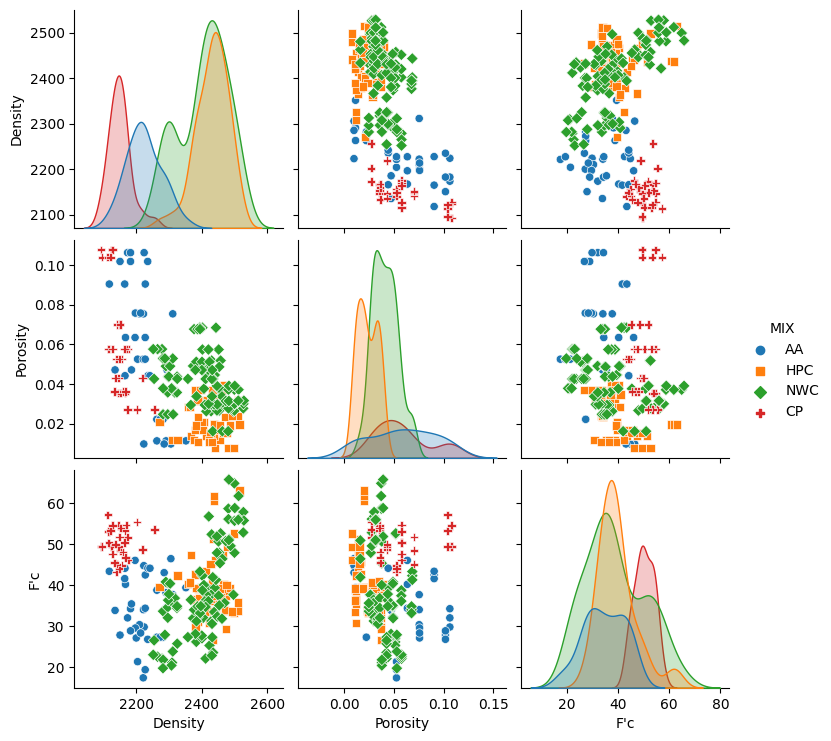

In [15]:
# Make pair-plot
all_data = gpr_label_data[["MIX", "Density", "Porosity", "F'c"]].copy()
all_data.dropna(inplace=True)

sns.pairplot(all_data, diag_kind='kde', hue = "MIX", markers=["o", "s", "D", "P"] )

The pairplot shows that normal weight concrete (portland cement mix) is the most common type of mix used in the study. Further no obvious correlation between the three materialprocan be observed from the pair-plot

In [16]:
# Let us look at the feature vector
features_file = './input_files/training_data_dinstav_all.csv'
features = pd.read_csv(features_file, header=None)

In [17]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,327.08,190.12,166.58,127.04,116.46,97.673,93.008,80.432,77.537,69.400,...,307.41,320.30,358.39,378.97,369.15,365.76,435.84,532.94,568.61,510.17
1,303.92,184.72,162.96,127.69,117.18,100.140,95.416,84.164,81.085,73.505,...,274.57,283.10,315.23,337.24,331.23,325.77,382.40,470.63,508.33,462.14
2,422.33,264.73,231.79,183.93,168.23,143.970,135.440,118.840,113.100,101.960,...,425.26,431.66,466.15,492.85,484.07,468.68,522.33,626.80,674.83,621.70
3,5032.70,3875.40,3627.90,3292.70,3188.40,2975.100,2882.900,2743.000,2683.600,2566.200,...,2634.90,2679.10,2837.90,3215.80,3411.90,3431.10,3682.80,4676.20,5555.10,5966.70
4,3793.80,2971.90,2814.90,2596.40,2549.60,2402.600,2343.000,2249.300,2216.700,2133.200,...,1619.00,1635.30,1709.20,1980.00,2147.70,2204.00,2392.70,3150.60,3852.20,4320.10


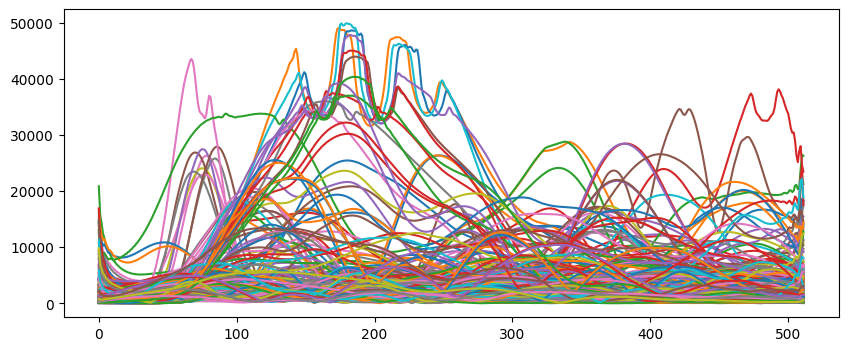

In [36]:
%matplotlib inline
plt.figure(figsize=(10,4))
plt.plot(np.linspace(0,511,512), features.T)